In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
    confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### step 1: Load And Split Data

In [4]:
print("Loading data...")
df = pd.read_csv('engineered_dataset.csv')

# Split features and target
X = df.drop(['target'], axis=1)  
y = df['target']

print("\nFeatures included:", X.columns.tolist())
print("\nDataset shape:", X.shape)
print("\nClass distribution:")
print(y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Loading data...

Features included: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'category_1', 'region_Region A', 'region_Region B', 'region_Region C', 'positive_predictors_mean', 'category_predictor_interaction']

Dataset shape: (9000, 14)

Class distribution:
target
0    0.524556
1    0.475444
Name: proportion, dtype: float64


### step 2: Scale Features

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save feature names for later use
feature_names = X.columns


### step 3: Initialize Models

In [6]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100),
    'AdaBoost': AdaBoostClassifier(random_state=42, n_estimators=100)
}

# Dictionary to store all results
results = {}

### step 4: Train And Evaluate Models


Training and evaluating Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       944
           1       0.84      0.87      0.86       856

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800


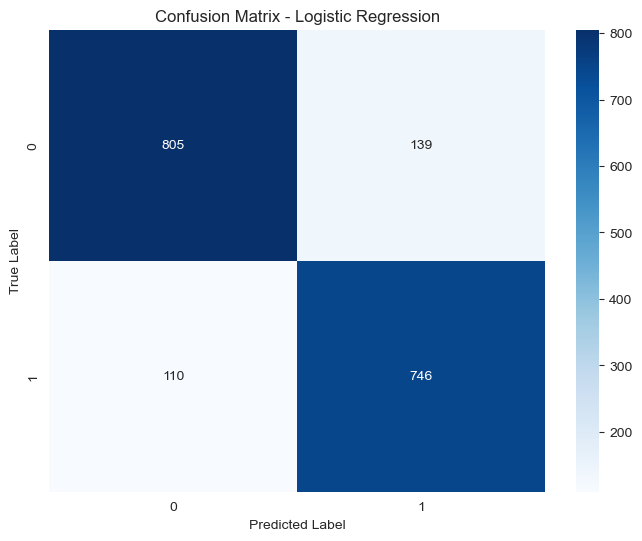

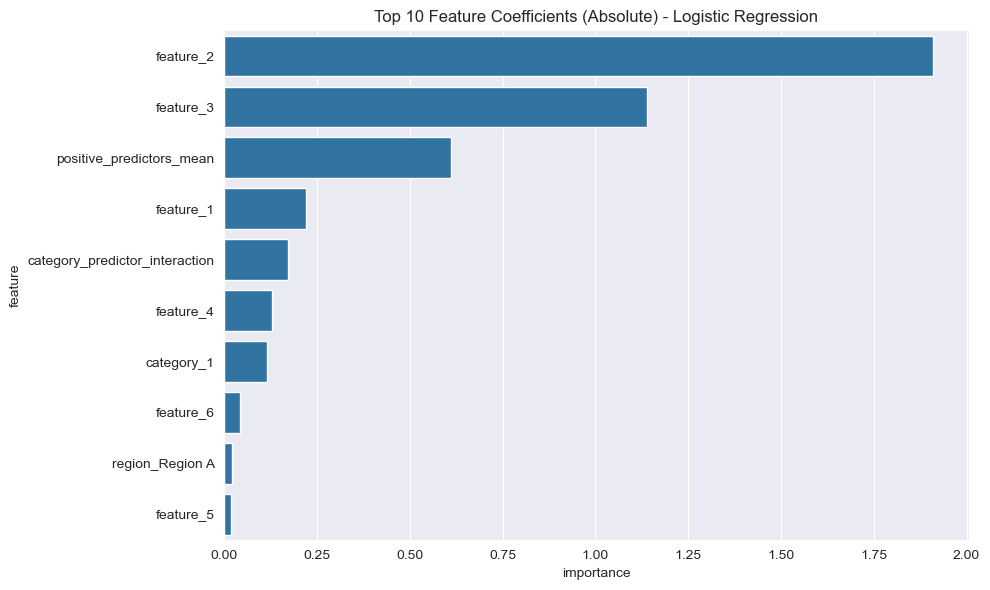


Top 5 features with highest coefficients for Logistic Regression:
                           feature  importance
1                        feature_2    1.910046
2                        feature_3    1.140199
12        positive_predictors_mean    0.611237
0                        feature_1    0.220219
13  category_predictor_interaction    0.170287

Training and evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       944
           1       0.81      0.84      0.82       856

    accuracy                           0.83      1800
   macro avg       0.83      0.83      0.83      1800
weighted avg       0.83      0.83      0.83      1800


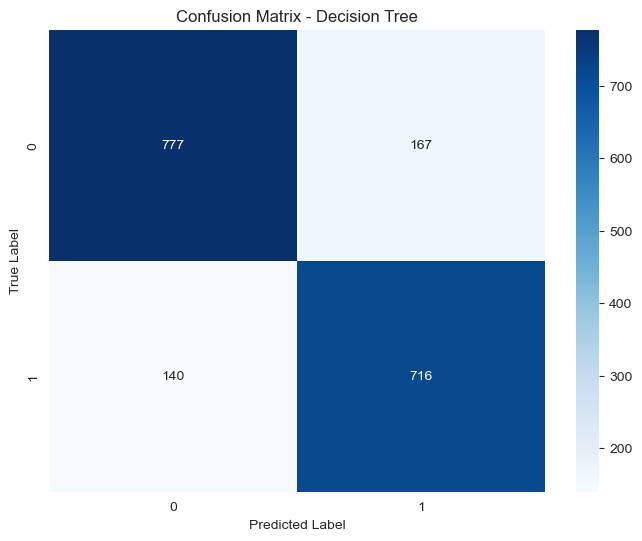

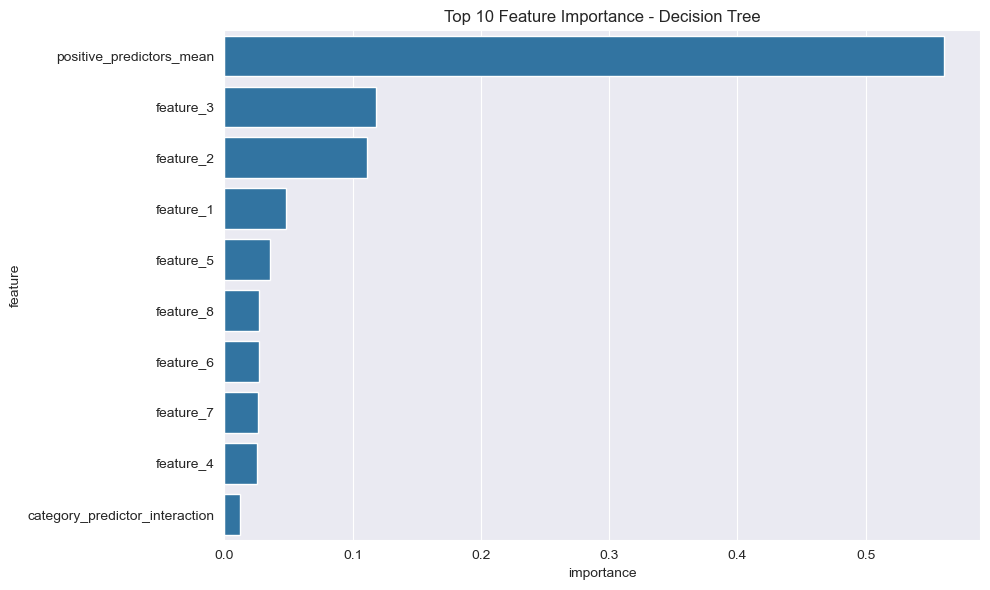


Top 5 important features for Decision Tree:
                     feature  importance
12  positive_predictors_mean    0.561056
2                  feature_3    0.117969
1                  feature_2    0.110961
0                  feature_1    0.047988
4                  feature_5    0.035595

Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       944
           1       0.89      0.86      0.88       856

    accuracy                           0.88      1800
   macro avg       0.88      0.88      0.88      1800
weighted avg       0.88      0.88      0.88      1800


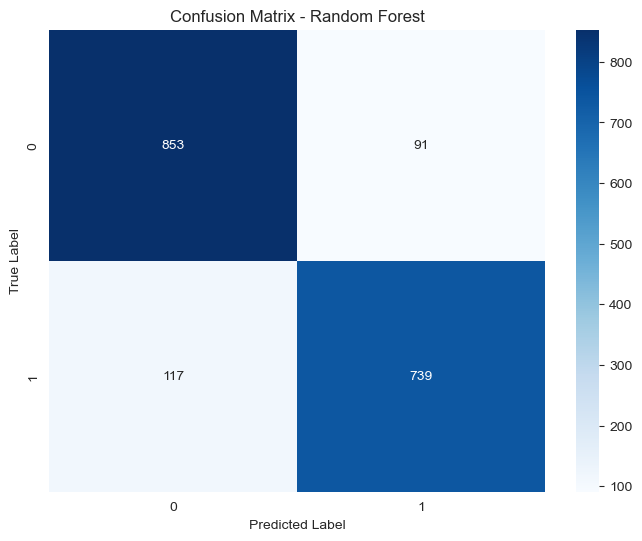

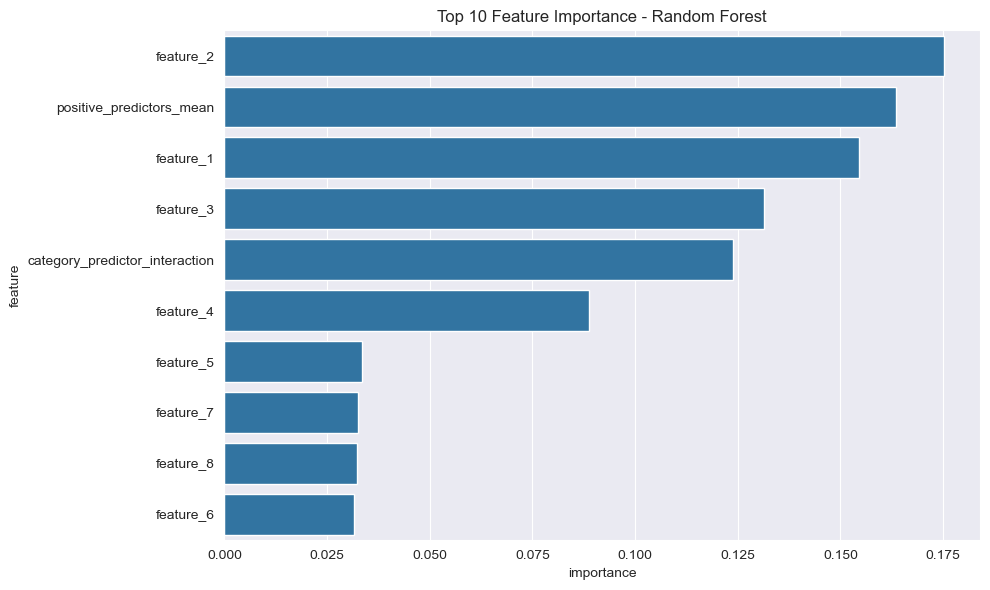


Top 5 important features for Random Forest:
                           feature  importance
1                        feature_2    0.175204
12        positive_predictors_mean    0.163554
0                        feature_1    0.154529
2                        feature_3    0.131284
13  category_predictor_interaction    0.123788

Training and evaluating Gradient Boosting...

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       944
           1       0.90      0.87      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.89      0.89      1800
weighted avg       0.89      0.89      0.89      1800


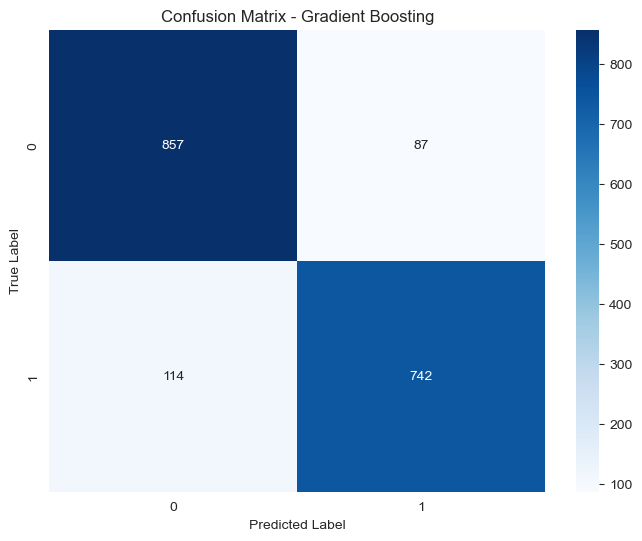

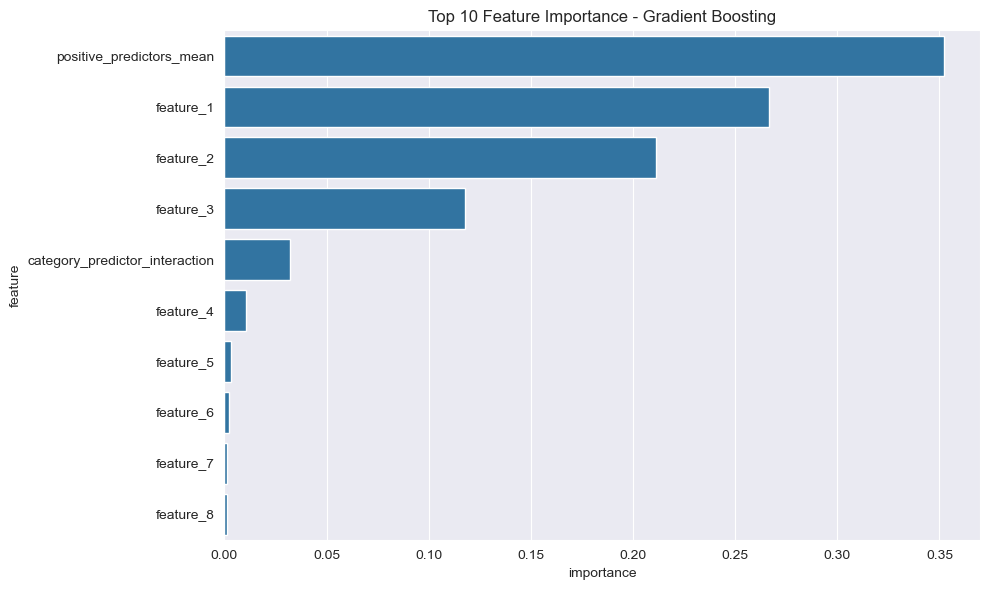


Top 5 important features for Gradient Boosting:
                           feature  importance
12        positive_predictors_mean    0.352227
0                        feature_1    0.266367
1                        feature_2    0.211286
2                        feature_3    0.117827
13  category_predictor_interaction    0.031882

Training and evaluating AdaBoost...

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       944
           1       0.89      0.87      0.88       856

    accuracy                           0.89      1800
   macro avg       0.89      0.88      0.89      1800
weighted avg       0.89      0.89      0.89      1800


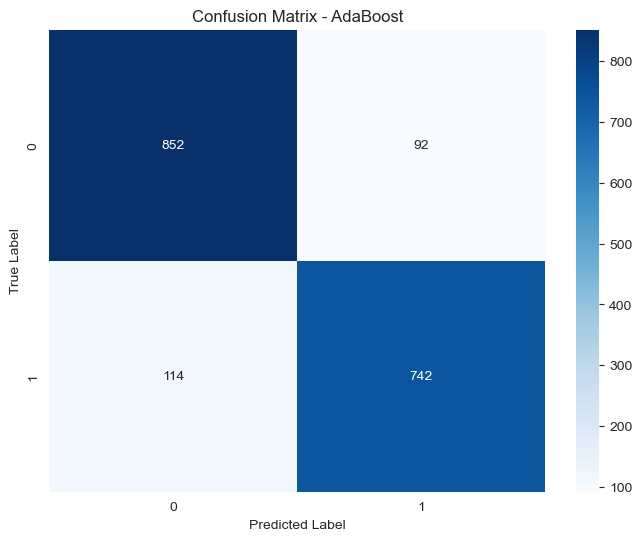

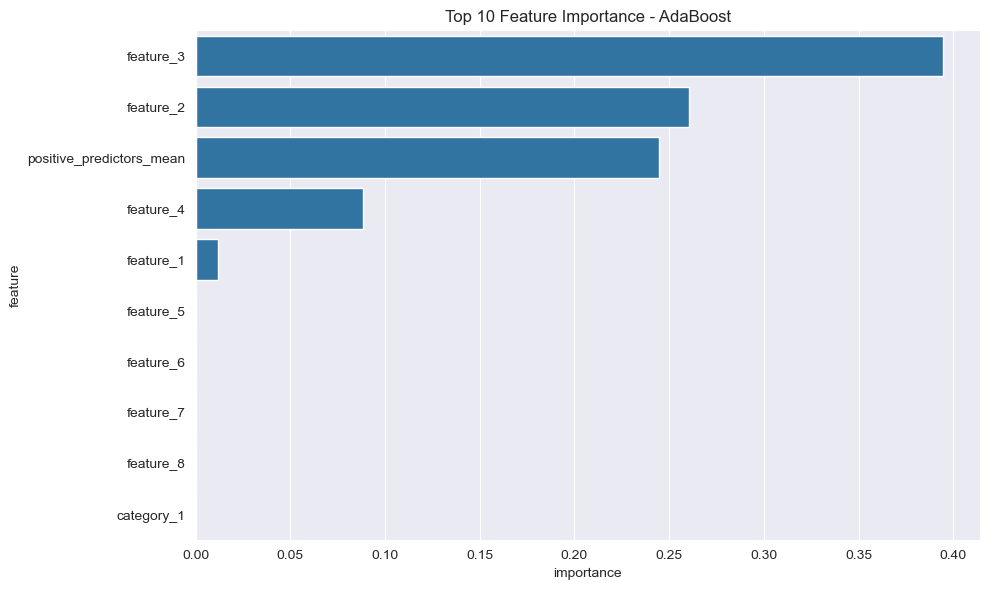


Top 5 important features for AdaBoost:
                     feature  importance
2                  feature_3    0.394371
1                  feature_2    0.260719
12  positive_predictors_mean    0.244564
3                  feature_4    0.088555
0                  feature_1    0.011791


In [7]:
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    }
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    results[name]['CV_Mean'] = cv_scores.mean()
    results[name]['CV_Std'] = cv_scores.std()
    
    # Print detailed classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance (for applicable models)
    if hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=importances.head(10))
        plt.title(f'Top 10 Feature Importance - {name}')
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 5 important features for {name}:")
        print(importances.head())
    elif name == 'Logistic Regression':
        importances = pd.DataFrame({
            'feature': feature_names,
            'importance': abs(model.coef_[0])
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='importance', y='feature', data=importances.head(10))
        plt.title(f'Top 10 Feature Coefficients (Absolute) - {name}')
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 5 features with highest coefficients for {name}:")
        print(importances.head())


### step 5: Convert results to DataFrame for comparison

In [8]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).round(3)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
           Logistic Regression  Decision Tree  Random Forest  \
Accuracy                 0.862          0.829          0.884   
Precision                0.843          0.811          0.890   
Recall                   0.871          0.836          0.863   
F1                       0.857          0.823          0.877   
ROC-AUC                  0.934          0.830          0.955   
CV_Mean                  0.856          0.835          0.878   
CV_Std                   0.015          0.010          0.010   

           Gradient Boosting  AdaBoost  
Accuracy               0.888     0.886  
Precision              0.895     0.890  
Recall                 0.867     0.867  
F1                     0.881     0.878  
ROC-AUC                0.959     0.950  
CV_Mean                0.880     0.867  
CV_Std                 0.010     0.016  


### step 6: Visualize results

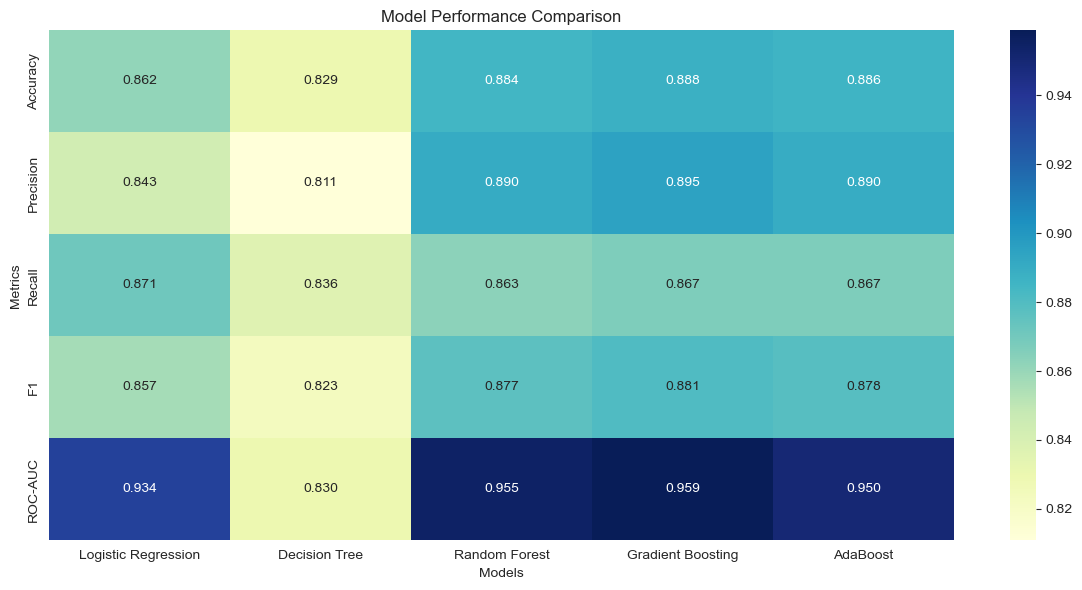

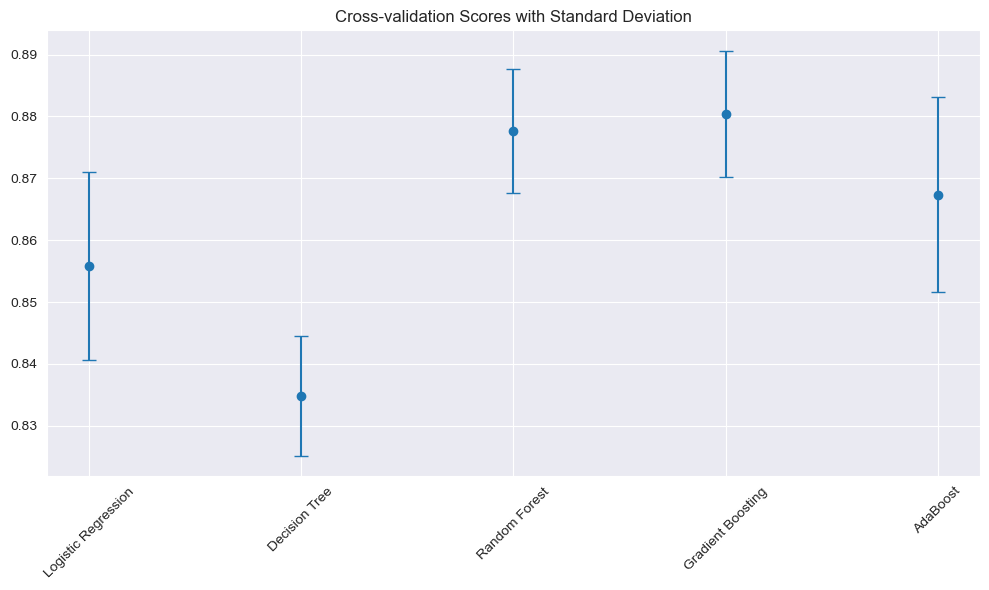

In [9]:
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']
results_plot = pd.DataFrame(results).loc[metrics]
sns.heatmap(results_plot, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Model Performance Comparison')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.tight_layout()
plt.show()
cv_results = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Score': [results[model]['CV_Mean'] for model in results.keys()],
    'CV Std': [results[model]['CV_Std'] for model in results.keys()]
})
plt.figure(figsize=(10, 6))
plt.errorbar(cv_results['Model'], cv_results['CV Score'], 
            yerr=cv_results['CV Std'], fmt='o', capsize=5)
plt.title('Cross-validation Scores with Standard Deviation')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### step 7: Save Models

In [10]:
# Save all models
for name, model in models.items():
    joblib.dump(model, f'{name.lower().replace(" ", "_")}_model.joblib')
    print(f"Saved {name} model")

# Save the scaler
joblib.dump(scaler, 'feature_scaler.joblib')
print("Saved feature scaler")

# Save results to CSV
results_df.to_csv('model_comparison_results.csv')
print("Saved model comparison results")

# Print final summary
print("\nModeling Summary:")
print("-" * 50)
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Accuracy: {metrics['Accuracy']:.3f}")
    print(f"ROC-AUC: {metrics['ROC-AUC']:.3f}")
    print(f"Cross-validation Score: {metrics['CV_Mean']:.3f} (+/- {metrics['CV_Std']*2:.3f})")

Saved Logistic Regression model
Saved Decision Tree model
Saved Random Forest model
Saved Gradient Boosting model
Saved AdaBoost model
Saved feature scaler
Saved model comparison results

Modeling Summary:
--------------------------------------------------

Logistic Regression:
Accuracy: 0.862
ROC-AUC: 0.934
Cross-validation Score: 0.856 (+/- 0.030)

Decision Tree:
Accuracy: 0.829
ROC-AUC: 0.830
Cross-validation Score: 0.835 (+/- 0.019)

Random Forest:
Accuracy: 0.884
ROC-AUC: 0.955
Cross-validation Score: 0.878 (+/- 0.020)

Gradient Boosting:
Accuracy: 0.888
ROC-AUC: 0.959
Cross-validation Score: 0.880 (+/- 0.020)

AdaBoost:
Accuracy: 0.886
ROC-AUC: 0.950
Cross-validation Score: 0.867 (+/- 0.032)
